<a href="https://colab.research.google.com/github/Alqurtubi17/Bank-Multiple-Linear-Regression/blob/master/Regresi_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import pylab 
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import shapiro
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [2]:
url = "https://raw.githubusercontent.com/Alqurtubi17/Bank-Multiple-Linear-Regression/master/BANK%20-%20Data.csv"
df = pd.read_csv(url,sep = ';')
df.head(5)

,Bank BPD,Tahun,Roa,Risiko,Kredit Masalah Produktif,Total Kredit Produktif,Total Kredit,NPL Produktif,Total Aset,Diversifikasi,Beban Training,Beban SDM,Persentase Beban Training,LN Total Aset,GDP
0,Sulawesi.Selatan.dan.Sulawesi.Barat,2018,3.67,0.78,45657507948,3315582238093,15971679770192,1.38,20576423170440,77.62,4818109026,434007307623,1.11,30.6552,-1.278195
1,Sulawesi.Selatan.dan.Sulawesi.Barat,2019,3.36,0.16,192916456606,3993982225607,18424050956824,4.83,23541662250195,78.26,6150024591,432727372659,1.42,30.7898,-6.655974
2,Sulawesi.Selatan.dan.Sulawesi.Barat,2020,3.12,0.28,96475990095,4545728882592,19653526947618,2.12,24830410397906,79.15,7383405548,485262938979,1.52,30.8431,500.964630
3,Sulawesi.Selatan.dan.Sulawesi.Barat,2021,3.09,0.15,132615330379,4673364835103,21267419581139,2.84,27784972251064,76.54,14234938688,531917397085,2.68,30.9555,143.134535
4,Jawa.Barat,2018,1.71,0.26,1025468000000,18969885000000,79991787000000,5.41,120191387000000,66.55,110758000000,2160020000000,5.13,32.4201,-0.920277


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bank BPD                   104 non-null    object 
 1   Tahun                      104 non-null    int64  
 2   Roa                        104 non-null    float64
 3   Risiko                     104 non-null    float64
 4   Kredit Masalah Produktif   104 non-null    int64  
 5   Total Kredit Produktif     104 non-null    int64  
 6   Total Kredit               104 non-null    int64  
 7   NPL Produktif              104 non-null    float64
 8   Total Aset                 104 non-null    int64  
 9   Diversifikasi              104 non-null    float64
 10  Beban Training             104 non-null    int64  
 11  Beban SDM                  104 non-null    int64  
 12  Persentase Beban Training  104 non-null    float64
 13  LN Total Aset              104 non-null    float64

In [4]:
df.describe()

,Tahun,Roa,Risiko,Kredit Masalah Produktif,Total Kredit Produktif,Total Kredit,NPL Produktif,Total Aset,Diversifikasi,Beban Training,Beban SDM,Persentase Beban Training,LN Total Aset,GDP
count,104.000000,104.000000,104.000000,1.040000e+02,1.040000e+02,1.040000e+02,104.000000,1.040000e+02,104.000000,1.040000e+02,1.040000e+02,104.000000,104.000000,104.000000
mean,2019.500000,2.074615,0.372981,3.826994e+11,6.284176e+12,1.832056e+13,7.442885,2.861352e+13,65.393462,1.818798e+10,5.783051e+11,3.346538,30.640659,1755.285805
std,1.123448,1.093757,0.482566,3.733283e+11,6.606142e+12,1.848367e+13,7.438599,2.914401e+13,9.255247,1.738478e+10,5.087182e+11,1.691112,0.786730,13496.204808
min,2018.000000,-3.080000,0.030000,1.047808e+10,1.475305e+11,3.084002e+12,0.420000,5.337281e+12,34.850000,8.972211e+08,1.190050e+11,0.500000,29.305700,-16321.000000
25%,2018.750000,1.755000,0.160000,5.514799e+10,1.307956e+12,6.857503e+12,3.172500,1.097484e+13,58.840000,6.917092e+09,2.271667e+11,1.897500,30.026600,-0.127750
50%,2019.500000,2.155000,0.300000,3.145542e+11,3.848499e+12,1.328041e+13,5.615000,2.151546e+13,66.445000,1.290867e+10,4.754367e+11,3.270000,30.698850,3.575000
75%,2020.250000,2.730000,0.422500,5.387278e+11,8.145425e+12,1.900150e+13,9.017500,2.818776e+13,71.465000,2.458243e+10,6.684698e+11,4.450000,30.969925,5.315000
max,2021.000000,3.870000,4.670000,1.554787e+12,2.732683e+13,1.022319e+14,56.480000,1.583561e+14,82.610000,1.107580e+11,2.922119e+12,8.550000,32.695900,129307.000000


## Variabel Independen (X) dan Variabel Dependen (Y1,Y2,Y3)

In [5]:
selected_cols = ['Diversifikasi', 'Persentase Beban Training', 'LN Total Aset', 'GDP']
X = df.loc[:,selected_cols]
Y1 = df['Roa']
Y2 = df['Risiko']
Y3 = df['NPL Produktif']

## Korelasi

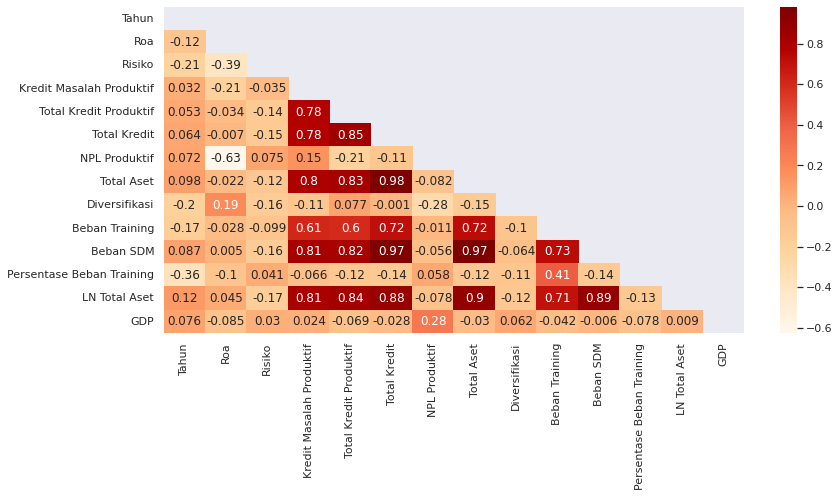

In [6]:
#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah

# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(13,6)}) 
sns.heatmap(df.corr(method='pearson').round(3), annot=True, cmap='OrRd', mask=mask)

# Kinerja(ROA) Multiple Regression

In [7]:
df1 = df.copy()

## Initial

#### Prepocessing

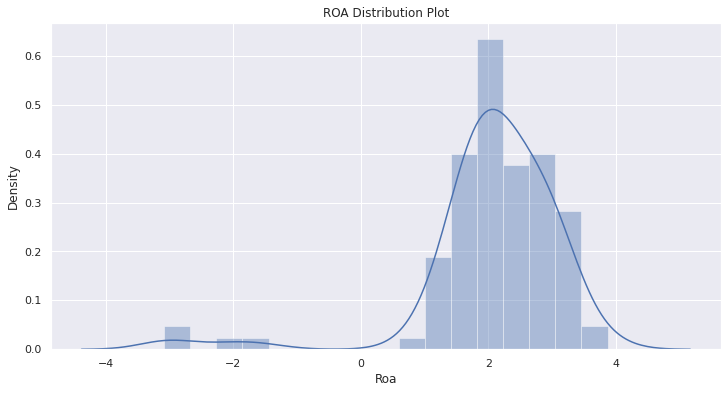

In [8]:
# Plot Distribusi Data
plt.figure(figsize=(12, 6))
plt.title('ROA Distribution Plot')
sns.distplot(Y1)

<function matplotlib.pyplot.show>

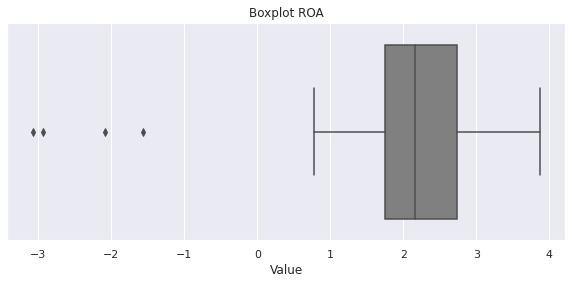

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df1['Roa'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot ROA')
plt.show

Karena terdapat beberapa outlier pada ROA maka kita akan menghapus outlier tersebut agar model yang nanti digunakan bisa signifikan

In [10]:
# Remove Outlier
# IQR
Q1 = np.percentile(df1['Roa'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Roa'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df1['Roa'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df1['Roa'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

<function matplotlib.pyplot.show>

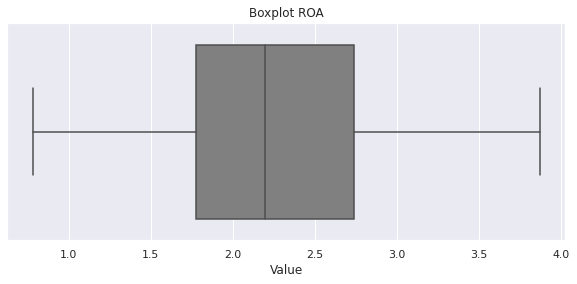

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df1['Roa'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot ROA')
plt.show

Didapatkan tidak terdapat outlier pada data ROA

### Multiple Regression Model

In [12]:
#Multiple Regression Model
x1 = df1[['Diversifikasi', 'Persentase Beban Training', 'LN Total Aset', 'GDP']]
Y1 = df1['Roa']
X1 = sm.add_constant(x1)
result = sm.OLS(Y1, X1).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Roa   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     5.419
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000566
Time:                        02:08:15   Log-Likelihood:                -82.768
No. Observations:                 100   AIC:                             175.5
Df Residuals:                      95   BIC:                             188.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Variabel independen Diversifikasi memiliki p-value > alpha sehingga variabel tersebut tidak signifikan terhadap variabel ROA(Kinerja), sehingga variabel tersebut harus dihapus dari variabel independen

In [13]:
#Multiple Regression Model
x1 = df1[['Persentase Beban Training', 'LN Total Aset', 'GDP']]
X1 = sm.add_constant(x1)
result = sm.OLS(Y1, X1).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Roa   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     7.300
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000184
Time:                        02:08:15   Log-Likelihood:                -82.768
No. Observations:                 100   AIC:                             173.5
Df Residuals:                      96   BIC:                             184.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R² berkisar antara 0 dan 1, di mana R²=0 berarti tidak ada hubungan linier antara variabel dan R²=1 menunjukkan hubungan linier yang sempurna. Dalam kasus ini, kita mendapat skor R² sekitar 0.186 yang berarti 18.6% dari variabel dependen dapat dijelaskan menggunakan variabel independen.

In [14]:
#F-Test (ANOVA)
print('F-statistic:', result.fvalue)
print('Probability of observing value at least as high as F-statistic:', result.f_pvalue)

F-statistic: 7.300350568341403
Probability of observing value at least as high as F-statistic: 0.00018423188010704112


Karena f_pvalue yang didapat lebih rendah dari 0.05 yaitu 0.00018, kita dapat menyimpulkan bahwa model ini berkinerja lebih baik daripada model lain yang lebih sederhana.

#### Multiple Linear Regression Equation

$\hat{Y} = 10.7356 - 0.0868 X_1 - 0.2664 X_2 - 9.45\times10^{-6} X_3$

Atau

$\hat{Y}$ = 10.7356 - 0.0868 Persentase Beban Training - 0.2664 LN Total Aset - 9.45$\times10^{-6}$ GDP

Nilai intersep adalah perkiraan nilai rata-rata variabel dependen kita ketika semua nilai variabel independen kita adalah 0. Dalam kasus ini berarti bahwa persentase beban training bernilai 0 persen, nilai LN total aset bernilai 0 dan GPD suatu provinsi bernilai 0 maka nilai ROA dari suatu Bank BPD sekitar 10.7356

Untuk koefisien kami memiliki 3 nilai untuk variabel persentase beban training, LN total aset, dan GDP. Nilai ini mewakili hubungan variabel independen kita dengan variabel dependen, di mana perubahan tepat 1 pada variabel independen akan mengubah nilai variabel dependen dengan jumlah yang sama dengan koefisien. Misalnya, jika persentase beban training meningkat 10 persen makan akan menurunkan nilai ROA sekitar 0.868.

### Multiple Linear Regression Assumptions

#### Autocorrelation in Residual

H0: Tidak ada autokorelasi 

H1: Ada autokorelasi

In [15]:
# residuals model regresi linier berganda
err = result.resid

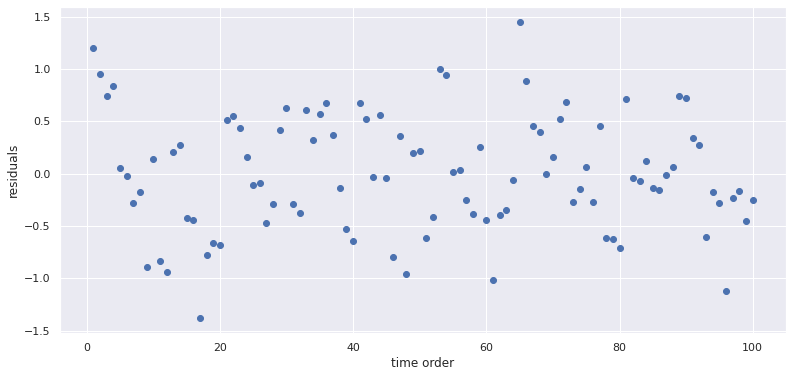

In [16]:
## membuat plot residuals vs time order
# membuat list time order
time=list(range(1,100+1)) #karena terdapat 100 data

plt.scatter(x=time, y=err)
plt.xlabel('time order', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

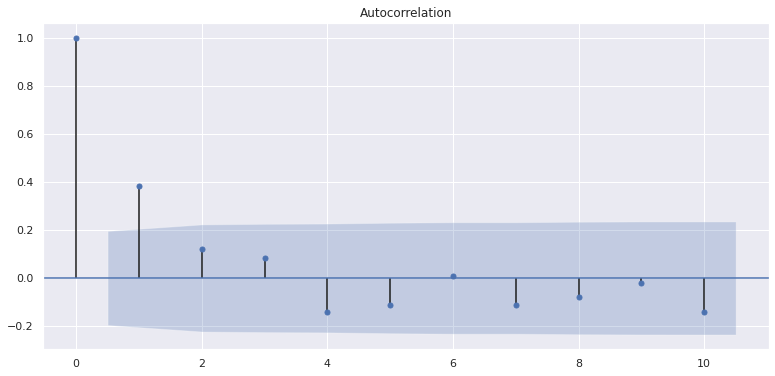

In [17]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(err, lags=10 , alpha=0.05)
acf.show()

Pada Lag 1 terlihat bahwa data tersebut melebihi area sehingga mengindikasikan terdapat autokorelasi positif dalam residual

Menentukan daerah kritis

Tolak H0: jika 0 < DW < dl  atau 4 – dl < DW < 4

Gagal tolak H0: jika du < DW <4 – du

Tidak ada keputusan : jika dl < DW < du atau 4 – du < DW < 4 – dl

Statistik uji

Karena nilai DW  1.182 dengan 0 < DW < dl atau 0 < 1.182 < 1.613 sehingga dapat dikatakan bahwa Tolak H0.  

Jadi, dengan tingkat signifikansi 5% dapat disimpulkan bahwa keputusan uji adalah terdapat Autokorelasi.

#### Normality in Residual

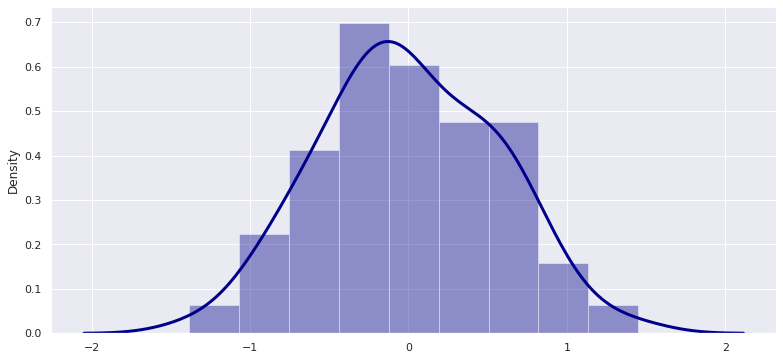

In [18]:
# membuat histogram
sns.distplot(err, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 3})

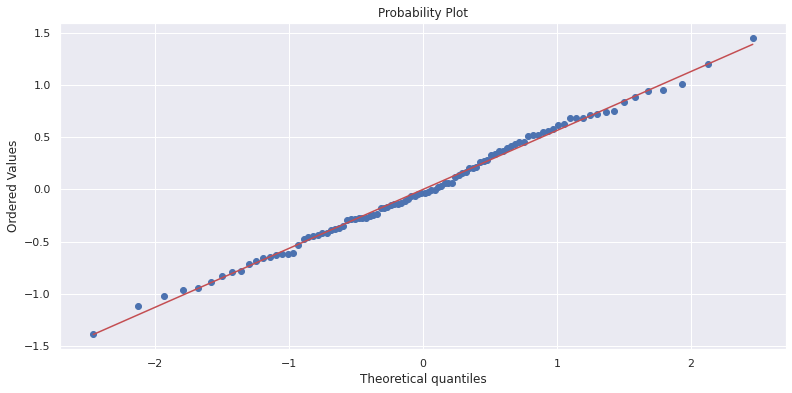

In [19]:
# membuat q-q plot
stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

Secara visual, data residual dikatakan berdistribusi normal apabila menyentuh atau mendekati garis. Jadi, data tersebut berdistribusi normal karena banyak data yang mendekati garis.

In [20]:
# uji normalitas dengan kolmogorov-smirnov test
ks = kstest(err,'norm')
print('Statistic KS:', ks.statistic.round(4))
print('P-value:', ks.pvalue.round(4))

# interpret
alpha = 0.05
if ks.pvalue > alpha:
	print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
	print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistic KS: 0.1579
P-value: 0.0121
Data Tidak Berdistribusi Normal (Tolak H0)


In [21]:
# uji normalitas dengan shapiro wilk test
stat, p = shapiro(err)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
  print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistics=0.995, p=0.985
Data Berdistribusi Normal (Gagal Tolak H0)


Jadi, data disimpulkan bahwa residual tersebut berdistribusi normal dengan tingkat signifikansi sebesar 5%

#### Homoskedasticity in Residual

H0: Variansi error konstan (homoskedastatis)

H1: Variansi error tidak konstan (heteroskedastatis)

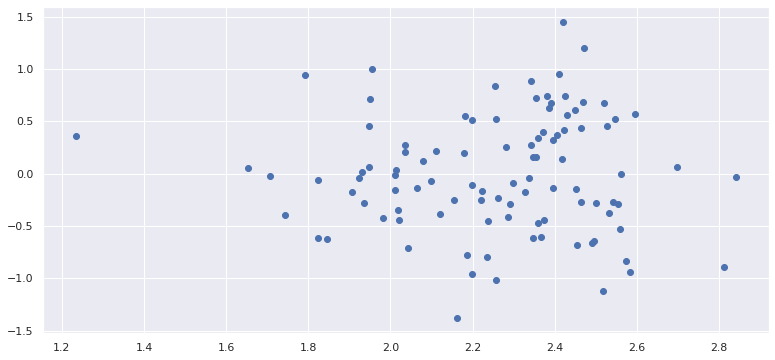

In [22]:
df1.rename(columns = {'Persentase Beban Training':'Persentase_Beban_Training', 'LN Total Aset':'LN_Total_Aset'}
           , inplace = True)
import statsmodels.formula.api as smf
lm =smf.ols(formula="Roa~Persentase_Beban_Training+LN_Total_Aset+GDP",data=df1).fit()
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [23]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(err, lm.model.exog, retres=False)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 9.195245682254615),
 ("LM test's p-value:", 0.41945014471382236),
 ('F-statistic:', 1.0126392336329082),
 ("F-test's p-value:", 0.43608895838118733)]

Tes LM: Statistik tes LM mengikuti distribusi Chi-kuadrat dengan derajat kebebasan = DF model - 1 = (4-1) = 3. Nilai p (0.419) sangat tinggi. Jadi kami menerima hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Uji-F: Statistik uji-F mengikuti distribusi-F. Sekali lagi, nilai p yang tinggi sebesar 0.436 menegaskan hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Secara keseluruhan, kami menyimpulkan bahwa kesalahan residual bersifat homoskedastik.

#### Linearity between Y(ROA) and X('Persentase Beban Training', 'LN Total Aset', 'GDP')

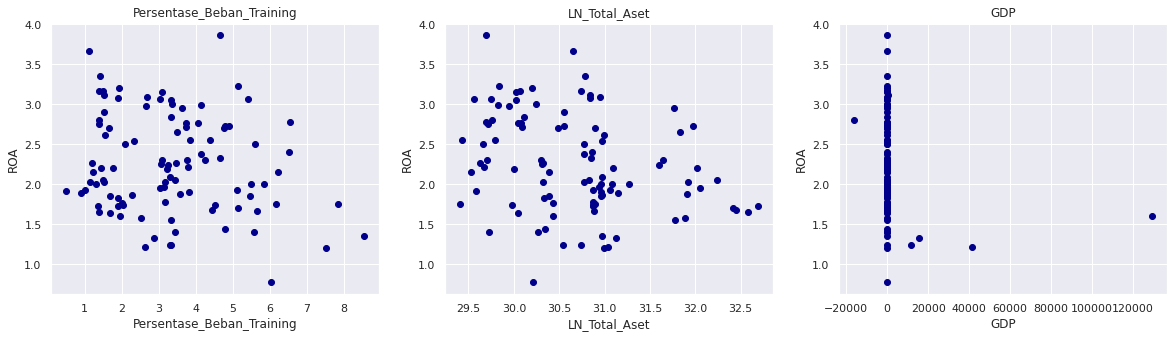

In [24]:
#untuk membuat scatter plot antara variabel respons dan variabel prediktor
plt.figure(figsize=(20, 5))

predictors = ['Persentase_Beban_Training', 'LN_Total_Aset', 'GDP']
response = df1['Roa']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df1[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('ROA')

#jika ingin membuat plot semua variabel
#sns.pairplot(df)
#plt.show()

##### Linear Relationship between X(Persentase Beban Training) and Y(ROA)

In [25]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df1['Persentase_Beban_Training'], df1['Roa'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.1793


Didapatkan nilai koefisien korelasi antara Persentase Beban Training dengan ROA dari metode pearsons sebesar -0.1793 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai Persentase Beban Training semakin meningkat maka nilai risiko semakin menurun dan sebaliknya

##### Linear Relationship between X(LN Total Aset) and Y(ROA)

In [26]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df1['LN_Total_Aset'], df1['Roa'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.3029


Didapatkan nilai koefisien korelasi antara LN Total Aset dengan ROA dari metode pearsons sebesar -0.3029 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai LN Total Aset semakin meningkat maka nilai ROA semakin menurun dan sebaliknya

##### Linear Relationship between X(GDP) and Y(ROA)

In [27]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df1['GDP'], df1['Roa'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.1930


Didapatkan nilai koefisien korelasi antara GDP dengan ROA dari metode pearsons sebesar -0.193 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai GDP suatu provinsi semakin meningkat maka nilai ROA semakin menurun dan sebaliknya

#### Multicollinearity in Independen Variabel

VIF score of an independent variable represents how well the variable is explained by other independent variables.

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 10 indicates high multicollinearity between this independent variable and the others

Hipotesis

H0: VIF < 10 artinya tidak terdapat Multikolinearitas.

H1: VIF > 10 artinya terdapat Multikolinearitas.

In [28]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]
  
print(vif_data)

                     feature       VIF
0  Persentase Beban Training  4.775174
1              LN Total Aset  4.827141
2                        GDP  1.023876


Kesimpulan:

Karena VIF kedua variabel independen < 10, maka tidak ada kasus multikolinieritas. 

Catatan tambahan:
Apabila di kasus lain terjadi multikolinieritas pada variabel independennya, maka hapus satu per satu variabel yang memiliki VIF paling tinggi.

## Scale

In [97]:
#MinMaxScaling
df_sc = df.copy()
sc = MinMaxScaler((-1,1))
X_sc = sc.fit_transform(X)

In [98]:
#Multiple Regression Model
Y1_sc = df_sc['Roa']
X1_sc = sm.add_constant(X_sc)
result = sm.OLS(Y1_sc, X1_sc).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Roa   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.466
Date:                Mon, 25 Jul 2022   Prob (F-statistic):              0.218
Time:                        04:31:17   Log-Likelihood:                -153.39
No. Observations:                 104   AIC:                             316.8
Df Residuals:                      99   BIC:                             330.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4307      0.471      3.039      0.0

# Risiko Multiple Regression

In [30]:
df2 = df.copy()

## Initial

#### Prepocessing

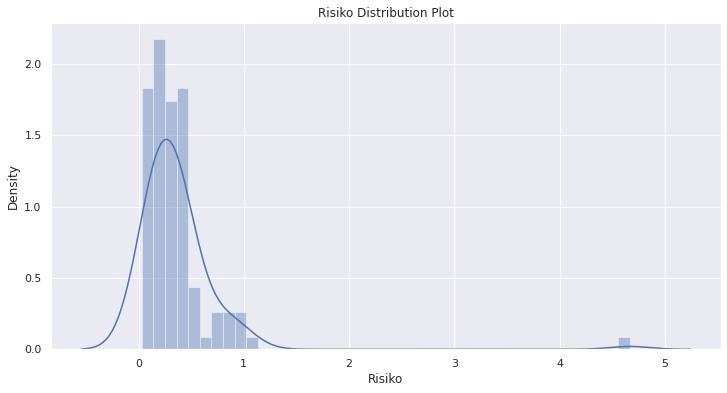

In [31]:
# Plot Distribusi Data
plt.figure(figsize=(12, 6))
plt.title('Risiko Distribution Plot')
sns.distplot(Y2)

<function matplotlib.pyplot.show>

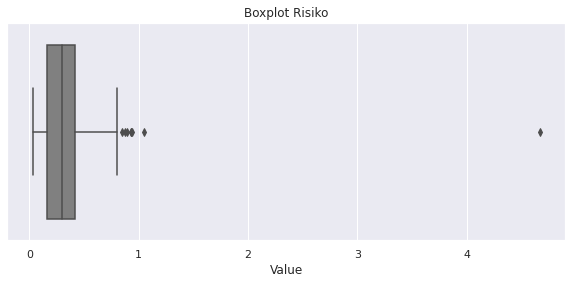

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df2['Risiko'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot Risiko')
plt.show

Karena terdapat beberapa outlier pada Risiko maka kita akan menghapus outlier tersebut agar model yang nanti digunakan bisa signifikan

In [33]:
# Remove Outlier
# IQR
Q1 = np.percentile(df2['Risiko'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['Risiko'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df2['Risiko'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['Risiko'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

<function matplotlib.pyplot.show>

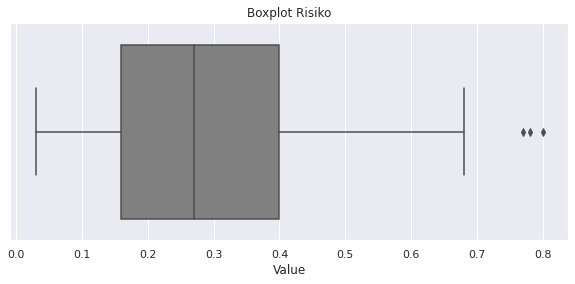

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df2['Risiko'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot Risiko')
plt.show

In [40]:
# Remove Outlier
# IQR
Q1 = np.percentile(df2['Risiko'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df2['Risiko'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df2['Risiko'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['Risiko'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)

<function matplotlib.pyplot.show>

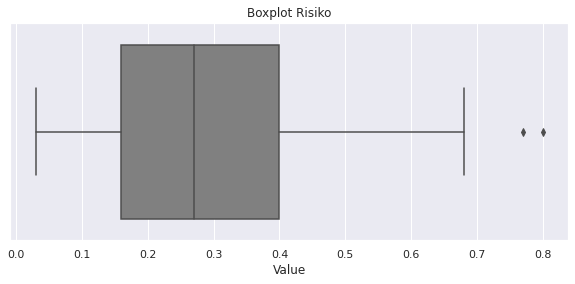

In [41]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df2['Risiko'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot Risiko')
plt.show

Didapatkan masih terdapat outlier pada data Risiko dan kita lanjutkan ke pembuatan model karena outlier tersebut masih dalam jangkauan nilai yang wajar dan tidak terlalu ekstrim

### Multiple Regression Model

In [42]:
#Multiple Regression Model
x2 = df2[['Diversifikasi', 'Persentase Beban Training', 'LN Total Aset', 'GDP']]
Y2 = df2['Risiko']
X2 = sm.add_constant(x2)
result = sm.OLS(Y2, X2).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Risiko   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.745
Date:                Mon, 25 Jul 2022   Prob (F-statistic):            0.00733
Time:                        02:09:06   Log-Likelihood:                 45.609
No. Observations:                  93   AIC:                            -81.22
Df Residuals:                      88   BIC:                            -68.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Variabel independen Persentase Beban Training dan GDP memiliki p-value > alpha sehingga variabel tersebut tidak signifikan terhadap variabel Risiko, sehingga variabel tersebut harus dihapus dari variabel independen

In [44]:
# Multiple Regression Model
x2 = df2[['Diversifikasi', 'LN Total Aset']]
X2 = sm.add_constant(x2)
result = sm.OLS(Y2, X2).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Risiko   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     5.564
Date:                Mon, 25 Jul 2022   Prob (F-statistic):            0.00527
Time:                        02:10:55   Log-Likelihood:                 43.720
No. Observations:                  93   AIC:                            -81.44
Df Residuals:                      90   BIC:                            -73.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1523      0.660      3.259

R² berkisar antara 0 dan 1, di mana R²=0 berarti tidak ada hubungan linier antara variabel dan R²=1 menunjukkan hubungan linier yang sempurna. Dalam kasus ini, kita mendapat skor R² sekitar 0,11 yang berarti 11% dari variabel dependen dapat dijelaskan menggunakan variabel independen.

In [45]:
#F-Test (ANOVA)
print('F-statistic:', result.fvalue)
print('Probability of observing value at least as high as F-statistic:', result.f_pvalue)

F-statistic: 5.56425567583323
Probability of observing value at least as high as F-statistic: 0.005267448286286681


Karena f_pvalue yang didapat lebih rendah dari 0.05 yaitu 0.005, kita dapat menyimpulkan bahwa model ini berkinerja lebih baik daripada model lain yang lebih sederhana.

#### Multiple Linear Regression Equation

$\hat{Y} = 2.1523 - 0.0044 X_1 - 0.0515 X_2$

Atau

$\hat{Y}$ = 2.1523 - 0.0044 Diversifikasi - 0.0515 LN Total Aset

Nilai intersep adalah perkiraan nilai rata-rata variabel dependen kita ketika semua nilai variabel independen kita adalah 0. Dalam kasus ini berarti bahwa nilai diversifikasi bernilai 0 dan nilai LN total aset bernilai 0 maka nilai Risiko dari suatu Bank BPD sekitar 2.5123

Untuk koefisien kami memiliki 2 nilai untuk variabel diversifikasi dan LN total aset. Nilai ini mewakili hubungan variabel independen kita dengan variabel dependen, di mana perubahan tepat 1 pada variabel independen akan mengubah nilai variabel dependen dengan jumlah yang sama dengan koefisien. Misalnya, jika nilai diversifikasi meningkat 10 makan akan menurunkan nilai Risiko sekitar 0,04.

### Multiple Linear Regression Assumptions

#### Autocorrelation in Residual

H0: Tidak ada autokorelasi 

H1: Ada autokorelasi

In [49]:
# residuals model regresi linier berganda
err = result.resid

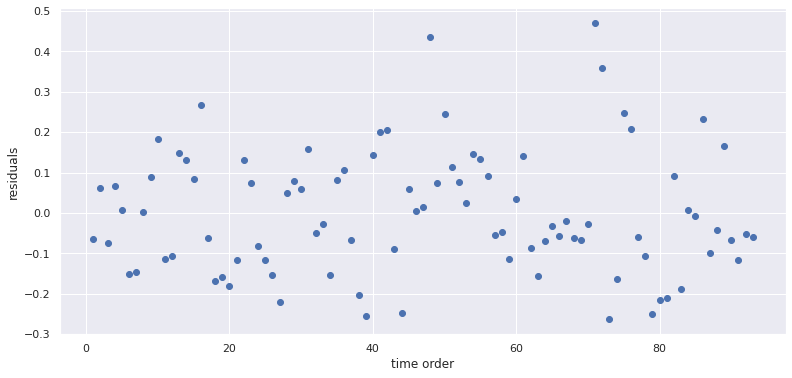

In [50]:
## membuat plot residuals vs time order
# membuat list time order
time=list(range(1,93+1)) #karena terdapat 93 data

plt.scatter(x=time, y=err)
plt.xlabel('time order', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

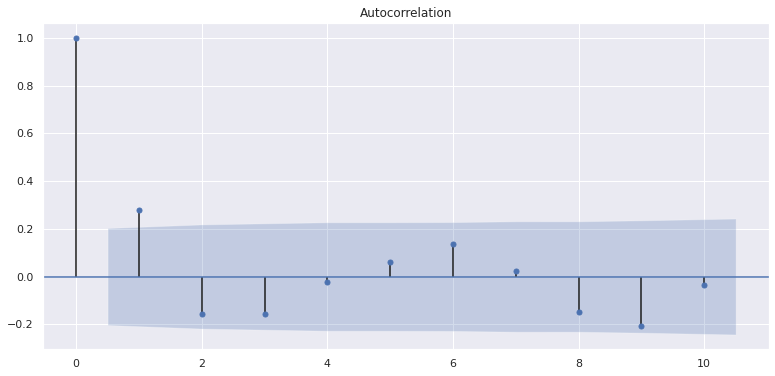

In [51]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(err, lags=10 , alpha=0.05)
acf.show()

Pada Lag 1 terlihat bahwa data tersebut melebihi area sehingga mengindikasikan terdapat autokorelasi positif dalam residual

Menentukan daerah kritis

Tolak H0: jika 0 < DW < dl  atau 4 – dl < DW < 4

Gagal tolak H0: jika du < DW <4 – du

Tidak ada keputusan : jika dl < DW < du atau 4 – du < DW < 4 – dl

Statistik uji

Karena nilai DW  1.442 dengan 0 < DW < dl atau 0 < 1.442 < 1.619 sehingga dapat dikatakan bahwa Tolak H0.  

Jadi, dengan tingkat signifikansi 5% dapat disimpulkan bahwa keputusan uji adalah terdapat Autokorelasi.

#### Normality in Residual

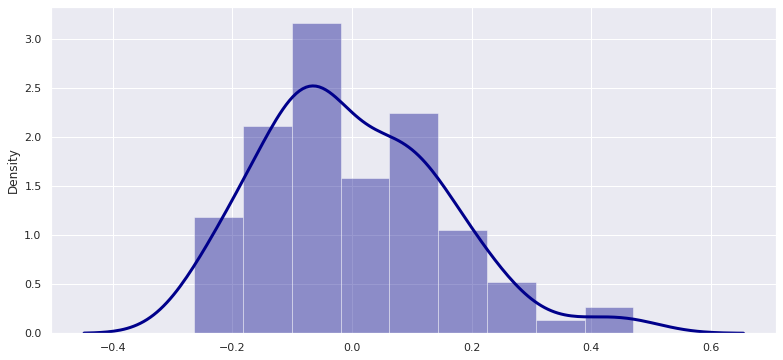

In [52]:
# membuat histogram
sns.distplot(err, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 3})

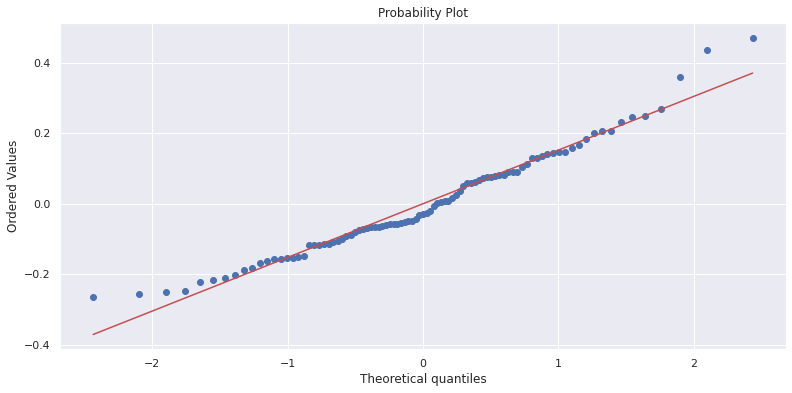

In [53]:
# membuat q-q plot
stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

Secara visual, data residual dikatakan berdistribusi normal apabila menyentuh atau mendekati garis. Jadi, data tersebut berdistribusi normal karena banyak data yang mendekati garis.

In [54]:
# uji normalitas dengan kolmogorov-smirnov test
ks = kstest(err,'norm')
print('Statistic KS:', ks.statistic.round(4))
print('P-value:', ks.pvalue.round(4))

# interpret
alpha = 0.05
if ks.pvalue > alpha:
	print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
	print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistic KS: 0.396
P-value: 0.0
Data Tidak Berdistribusi Normal (Tolak H0)


In [55]:
# uji normalitas dengan shapiro wilk test
stat, p = shapiro(err)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
  print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistics=0.969, p=0.024
Data Tidak Berdistribusi Normal (Tolak H0)


#### Homoskedasticity in Residual

H0: Variansi error konstan (homoskedastatis)

H1: Variansi error tidak konstan (heteroskedastatis)

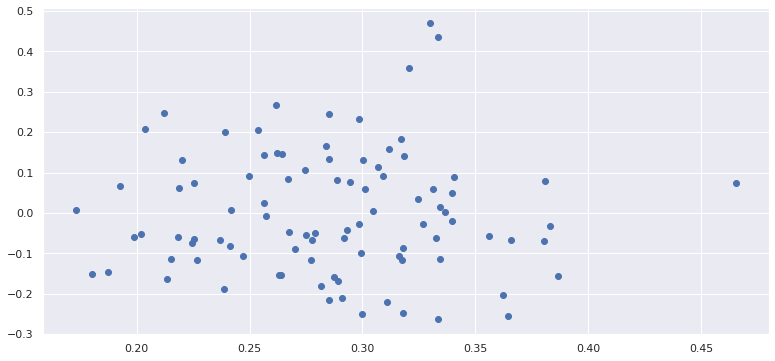

In [58]:
df2.rename(columns = {'Persentase Beban Training':'Persentase_Beban_Training', 'LN Total Aset':'LN_Total_Aset'}
           , inplace = True)
import statsmodels.formula.api as smf
lm =smf.ols(formula="Risiko~Diversifikasi+LN_Total_Aset",data=df2).fit()
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [59]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(err, lm.model.exog, retres=False)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 6.29024460799552),
 ("LM test's p-value:", 0.2789924290116932),
 ('F-statistic:', 1.2622600038981824),
 ("F-test's p-value:", 0.2875540819348637)]

Tes LM: Statistik tes LM mengikuti distribusi Chi-kuadrat dengan derajat kebebasan = DF model - 1 = (4-1) = 3. Nilai p (0.279) sangat tinggi. Jadi kami menerima hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Uji-F: Statistik uji-F mengikuti distribusi-F. Sekali lagi, nilai p yang tinggi sebesar 0.288 menegaskan hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Secara keseluruhan, kami menyimpulkan bahwa kesalahan residual bersifat homoskedastik.

#### Linearity between Y(Risiko) and X(Diversifikasi, LN Total Aset)

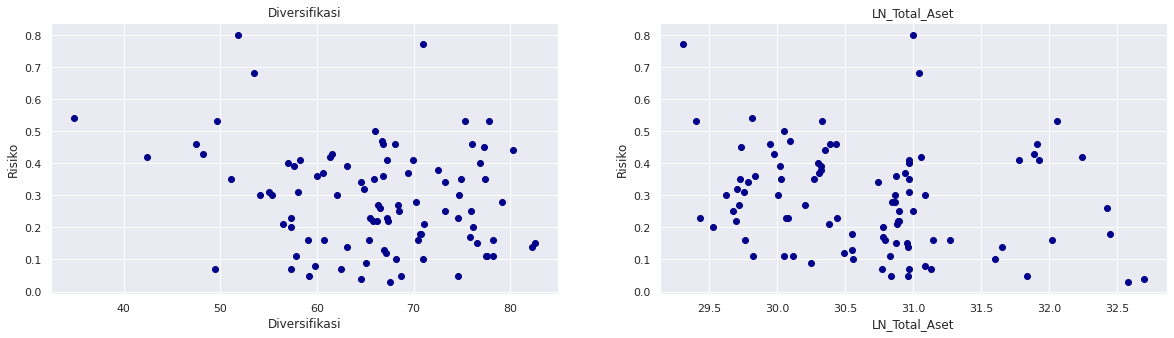

In [60]:
#untuk membuat scatter plot antara variabel respons dan variabel prediktor
plt.figure(figsize=(20, 5))

predictors = ['Diversifikasi', 'LN_Total_Aset']
response = df2['Risiko']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df2[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Risiko')

##### Linear Relationship between X(Diversifikasi) and Y(Risiko)

In [61]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df2['Diversifikasi'], df2['Risiko'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.2218


Didapatkan nilai koefisien korelasi antara Diversifikasi dengan Risiko dari metode pearsons sebesar -0.2218 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai diversifikasi semakin meningkat maka nilai risiko semakin menurun dan sebaliknya

##### Linear Relationship between X(LN Total Aset) and Y(ROA)

In [62]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df2['LN_Total_Aset'], df2['Risiko'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.2179


Didapatkan nilai koefisien korelasi antara LN Total Aset dengan ROA dari metode pearsons sebesar -0.2179 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai LN Total Aset semakin meningkat maka nilai risiko semakin menurun dan sebaliknya

#### Multicollinearity in Independen Variabel

Hipotesis

H0: VIF < 10 artinya tidak terdapat Multikolinearitas.

H1: VIF > 10 artinya terdapat Multikolinearitas.

In [63]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x2.values, i)
                          for i in range(len(x2.columns))]
  
print(vif_data)

         feature        VIF
0  Diversifikasi  48.243545
1  LN Total Aset  48.243545


Kesimpulan:

Karena VIF kedua variabel independen > 10, maka terdapat kasus multikolinieritas. 

# NPL Produktif Multiple Regression

In [64]:
df3 = df.copy()

,Bank BPD,Tahun,Roa,Risiko,Kredit Masalah Produktif,Total Kredit Produktif,Total Kredit,NPL Produktif,Total Aset,Diversifikasi,Beban Training,Beban SDM,Persentase Beban Training,LN Total Aset,GDP
0,Sulawesi.Selatan.dan.Sulawesi.Barat,2018,3.67,0.78,45657507948,3315582238093,15971679770192,1.38,20576423170440,77.62,4818109026,434007307623,1.11,30.6552,-1.278195
1,Sulawesi.Selatan.dan.Sulawesi.Barat,2019,3.36,0.16,192916456606,3993982225607,18424050956824,4.83,23541662250195,78.26,6150024591,432727372659,1.42,30.7898,-6.655974
2,Sulawesi.Selatan.dan.Sulawesi.Barat,2020,3.12,0.28,96475990095,4545728882592,19653526947618,2.12,24830410397906,79.15,7383405548,485262938979,1.52,30.8431,500.964630
3,Sulawesi.Selatan.dan.Sulawesi.Barat,2021,3.09,0.15,132615330379,4673364835103,21267419581139,2.84,27784972251064,76.54,14234938688,531917397085,2.68,30.9555,143.134535
4,Jawa.Barat,2018,1.71,0.26,1025468000000,18969885000000,79991787000000,5.41,120191387000000,66.55,110758000000,2160020000000,5.13,32.4201,-0.920277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Bengulu,2021,1.40,0.45,42443244935,1641126419774,6314958595308,2.59,8167684386937,77.32,8277314024,241226653909,3.43,29.7312,3.240000
100,Nagari,2018,2.03,0.17,483780729974,16148563340778,17577892514955,3.00,23190691424930,75.80,20983084997,663068784606,3.16,30.7748,5.140000
101,Nagari,2019,2.06,0.11,538302256123,17432398375257,18932547141295,3.09,24433595767423,77.49,27121668819,788456605453,3.44,30.8270,5.010000
102,Nagari,2020,1.78,0.15,540004437061,19559663891597,21113714892226,2.76,25559008291909,82.61,21602450650,684673011536,3.16,30.8720,-1.620000


## Initial

#### Prepocessing

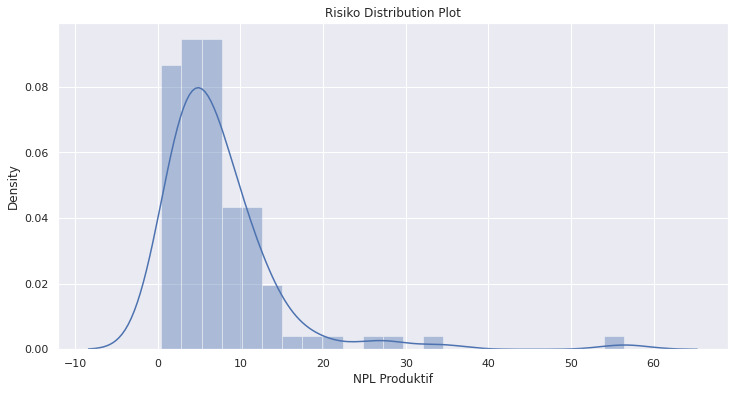

In [65]:
# Plot Distribusi Data
plt.figure(figsize=(12, 6))
plt.title('Risiko Distribution Plot')
sns.distplot(Y3)

<function matplotlib.pyplot.show>

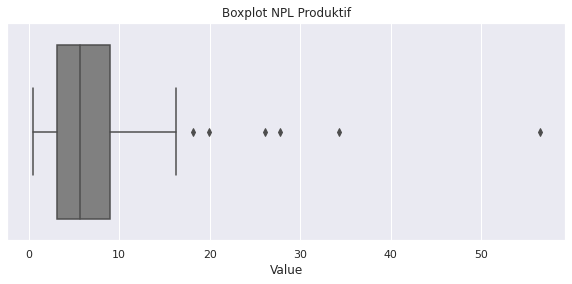

In [66]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df3['NPL Produktif'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot NPL Produktif')
plt.show

Karena terdapat beberapa outlier pada NPL Produktif maka kita akan menghapus outlier tersebut agar model yang nanti digunakan bisa signifikan

In [67]:
# Remove Outlier
# IQR
Q1 = np.percentile(df3['NPL Produktif'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3['NPL Produktif'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper = np.where(df3['NPL Produktif'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df3['NPL Produktif'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df3.drop(upper[0], inplace = True)
df3.drop(lower[0], inplace = True)

<function matplotlib.pyplot.show>

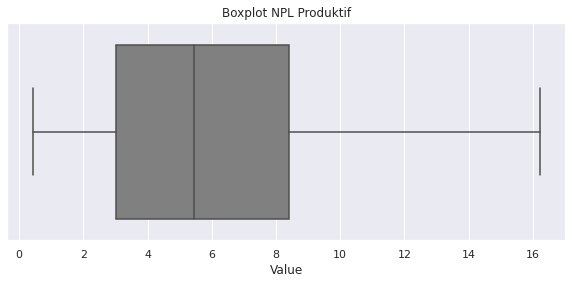

In [69]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df3['NPL Produktif'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot NPL Produktif')
plt.show

Didapatkan tidak terdapat outlier pada data NPL Produktif

### Multiple Regression Model

In [70]:
#Multiple Regression Model
x3 = df3[['Diversifikasi', 'Persentase Beban Training', 'LN Total Aset', 'GDP']]
Y3 = df3['NPL Produktif']
X3 = sm.add_constant(x3)
result = sm.OLS(Y3, X3).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          NPL Produktif   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3.278
Date:                Mon, 25 Jul 2022   Prob (F-statistic):             0.0146
Time:                        02:29:59   Log-Likelihood:                -260.79
No. Observations:                  98   AIC:                             531.6
Df Residuals:                      93   BIC:                             544.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Variabel independen LN Total Aset dan GDP memiliki p-value > alpha sehingga variabel tersebut tidak signifikan terhadap variabel NPL Produktif, sehingga variabel tersebut harus dihapus dari variabel independen

In [73]:
# Multiple Regression Model
x3 = df3[['Diversifikasi', 'Persentase Beban Training']]
X3 = sm.add_constant(x3)
result = sm.OLS(Y3, X3).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          NPL Produktif   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.850
Date:                Mon, 25 Jul 2022   Prob (F-statistic):            0.00987
Time:                        02:31:27   Log-Likelihood:                -262.49
No. Observations:                  98   AIC:                             531.0
Df Residuals:                      95   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R² berkisar antara 0 dan 1, di mana R²=0 berarti tidak ada hubungan linier antara variabel dan R²=1 menunjukkan hubungan linier yang sempurna. Dalam kasus ini, kita mendapat skor R² sekitar 0.093 yang berarti 9.3% dari variabel dependen dapat dijelaskan menggunakan variabel independen.

In [74]:
#F-Test (ANOVA)
print('F-statistic:', result.fvalue)
print('Probability of observing value at least as high as F-statistic:', result.f_pvalue)

F-statistic: 4.84977774170215
Probability of observing value at least as high as F-statistic: 0.009873962069085683


Karena f_pvalue yang didapat lebih rendah dari 0.05 yaitu 0.009, kita dapat menyimpulkan bahwa model ini berkinerja lebih baik daripada model lain yang lebih sederhana.

#### Multiple Linear Regression Equation

$\hat{Y} = 10.6033 - 0.0908 X_1 + 0.4128 X_2$

Atau

$\hat{Y}$ = 10.6033 - 0.0908 Diversifikasi + 0.4128 Persentase Beban Training

Nilai intersep adalah perkiraan nilai rata-rata variabel dependen kita ketika semua nilai variabel independen kita adalah 0. Dalam kasus ini berarti bahwa nilai diversifikasi bernilai 0 dan nilai persentase beban training bernilai 0 maka nilai NPL Produktif dari suatu Bank BPD sekitar 10.6033

Untuk koefisien kami memiliki 2 nilai untuk variabel diversifikasi dan persentase beban training. Nilai ini mewakili hubungan variabel independen kita dengan variabel dependen, di mana perubahan tepat 1 pada variabel independen akan mengubah nilai variabel dependen dengan jumlah yang sama dengan koefisien. Misalnya, jika nilai diversifikasi meningkat 10 makan akan menurunkan nilai NPL Produkif sekitar 0.908.

### Multiple Linear Regression Assumptions

#### Autocorrelation in Residual

H0: Tidak ada autokorelasi 

H1: Ada autokorelasi

In [77]:
# residuals model regresi linier berganda
err = result.resid

0     -2.635210
1      0.744924
2     -1.925561
3     -1.921332
4     -1.269555
         ...   
99    -2.410116
100   -2.026648
101   -1.898811
102   -1.648439
103   -2.388114
Length: 98, dtype: float64


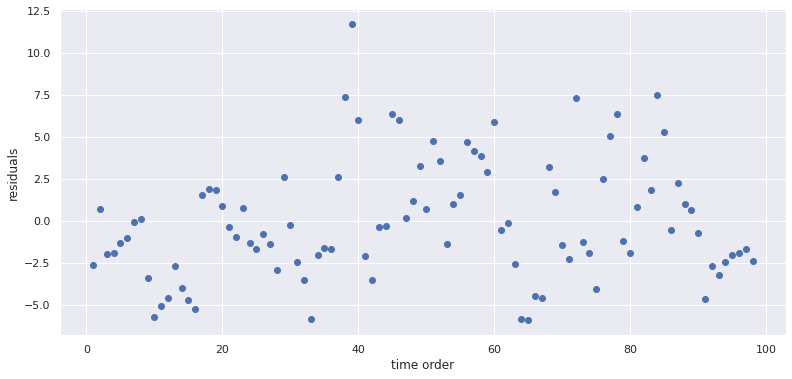

In [78]:
## membuat plot residuals vs time order
# membuat list time order
time=list(range(1,98+1)) #karena terdapat 98 data

plt.scatter(x=time, y=err)
plt.xlabel('time order', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

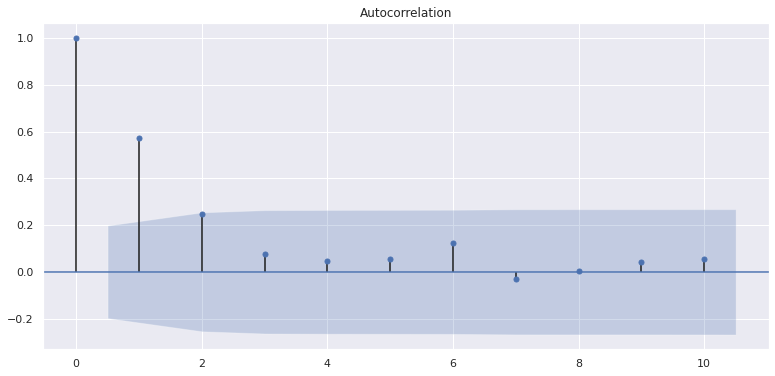

In [79]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(err, lags=10 , alpha=0.05)
acf.show()

Pada Lag 1 terlihat bahwa data tersebut melebihi area sehingga mengindikasikan terdapat autokorelasi positif dalam residual

Menentukan daerah kritis

Tolak H0: jika 0 < DW < dl  atau 4 – dl < DW < 4

Gagal tolak H0: jika du < DW <4 – du

Tidak ada keputusan : jika dl < DW < du atau 4 – du < DW < 4 – dl

Statistik uji

Karena nilai DW 0.849 dengan 0 < DW < dl atau 0 < 0.849 < 1.63 sehingga dapat dikatakan bahwa Tolak H0.  

Jadi, dengan tingkat signifikansi 5% dapat disimpulkan bahwa keputusan uji adalah terdapat Autokorelasi.

#### Normality in Residual

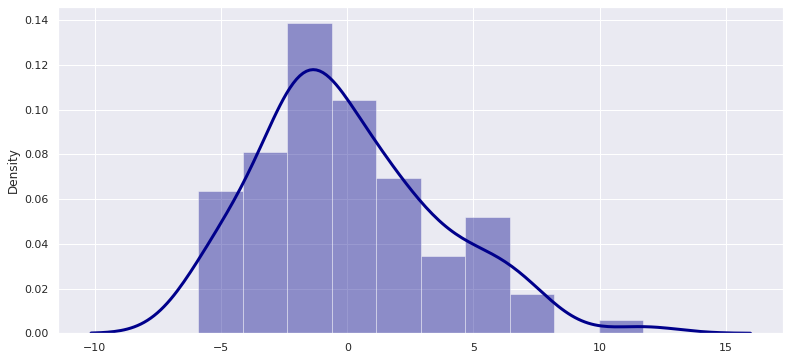

In [80]:
# membuat histogram
sns.distplot(err, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 3})

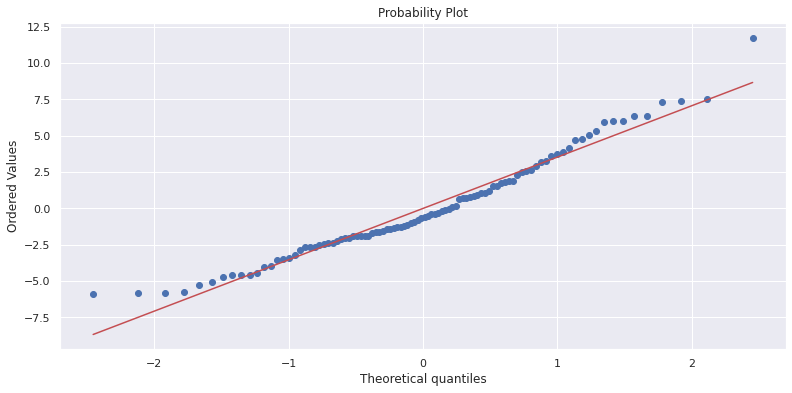

In [81]:
# membuat q-q plot
stats.probplot(err, dist="norm", plot=pylab)
pylab.show()

Secara visual, data residual dikatakan berdistribusi normal apabila menyentuh atau mendekati garis. Jadi, data tersebut berdistribusi normal karena banyak data yang mendekati garis.

In [82]:
# uji normalitas dengan kolmogorov-smirnov test
ks = kstest(err,'norm')
print('Statistic KS:', ks.statistic.round(4))
print('P-value:', ks.pvalue.round(4))

# interpret
alpha = 0.05
if ks.pvalue > alpha:
	print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
	print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistic KS: 0.3402
P-value: 0.0
Data Tidak Berdistribusi Normal (Tolak H0)


In [83]:
# uji normalitas dengan shapiro wilk test
stat, p = shapiro(err)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Data Berdistribusi Normal (Gagal Tolak H0)')
else:
  print('Data Tidak Berdistribusi Normal (Tolak H0)')

Statistics=0.963, p=0.008
Data Tidak Berdistribusi Normal (Tolak H0)


#### Homoskedasticity in Residual

H0: Variansi error konstan (homoskedastatis)

H1: Variansi error tidak konstan (heteroskedastatis)

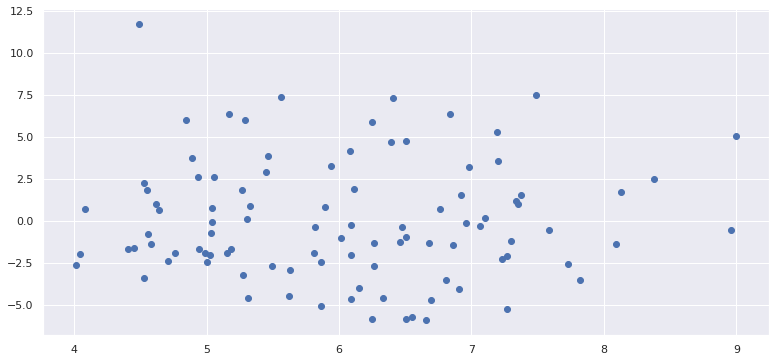

In [85]:
df3.rename(columns = {'Persentase Beban Training':'Persentase_Beban_Training', 'LN Total Aset':'LN_Total_Aset',
                      'NPL Produktif':'NPL_Produktif'}, inplace = True)
import statsmodels.formula.api as smf
lm =smf.ols(formula="NPL_Produktif~Diversifikasi+Persentase_Beban_Training",data=df3).fit()
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [86]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(err, lm.model.exog, retres=False)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 1.1424273429132774),
 ("LM test's p-value:", 0.9502799852258639),
 ('F-statistic:', 0.2170265321847941),
 ("F-test's p-value:", 0.9544355152485384)]

Tes LM: Statistik tes LM mengikuti distribusi Chi-kuadrat dengan derajat kebebasan = DF model - 1 = (3-1) = 2. Nilai p (0.95) sangat tinggi. Jadi kami menerima hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Uji-F: Statistik uji-F mengikuti distribusi-F. Sekali lagi, nilai p yang tinggi sebesar 0.954 menegaskan hipotesis nol dari tes bahwa tidak ada heterokedastatis dalam kesalahan residual.

Secara keseluruhan, kami menyimpulkan bahwa kesalahan residual bersifat homoskedastik.

#### Linearity between Y(NPL Produktif) and X(Diversifikasi, Persentase Beban Training)

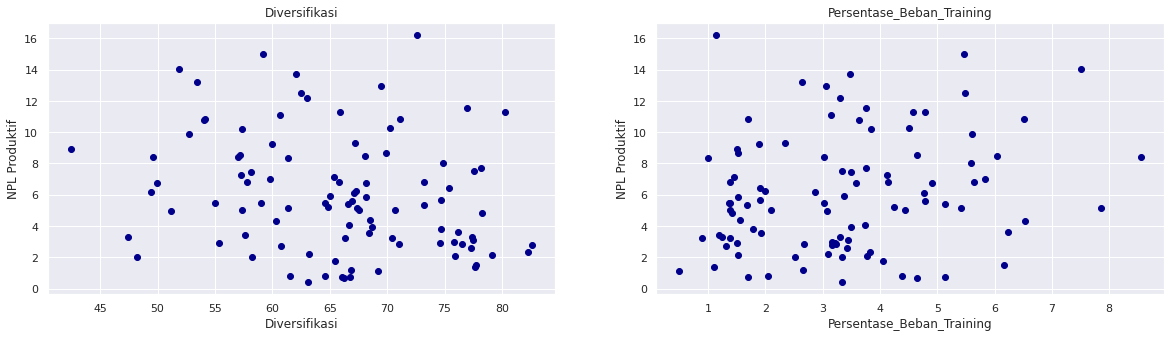

In [88]:
#untuk membuat scatter plot antara variabel respons dan variabel prediktor
plt.figure(figsize=(20, 5))

predictors = ['Diversifikasi', 'Persentase_Beban_Training']
response = df3['NPL_Produktif']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df3[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('NPL Produktif')

##### Linear Relationship between X(Diversifikasi) and Y(NPL Produktif)

In [89]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df3['Diversifikasi'], df3['NPL_Produktif'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: -0.2378


Didapatkan nilai koefisien korelasi antara Diversifikasi dengan NPL Produktif dari metode pearsons sebesar -0.2378 karena bernilai negatif maka garis linier dari kiri semakin turun ke kanan dengan kata lain jika nilai diversifikasi semakin meningkat maka nilai npl produktif semakin menurun dan sebaliknya

##### Linear Relationship between X(Persentase Beban Training) and Y(NPL Produktif)

In [90]:
# menghitung nilai korelasi X dan Y
corr, _ = pearsonr(df3['Persentase_Beban_Training'], df3['NPL_Produktif'])
print('Pearsons correlation: %.4f' % corr)

Pearsons correlation: 0.2161


Didapatkan nilai koefisien korelasi antara Persentase Beban Training dengan NPL Produktif dari metode pearsons sebesar 0.2161 karena bernilai positif maka garis linier dari kiri semakin naik ke kanan dengan kata lain jika nilai Persentase Beban Training semakin meningkat maka nilai NPL Produktif semakin meningkat dan sebaliknya

#### Multicollinearity in Independen Variabel

Hipotesis

H0: VIF < 10 artinya tidak terdapat Multikolinearitas.

H1: VIF > 10 artinya terdapat Multikolinearitas.

In [91]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x3.values, i)
                          for i in range(len(x3.columns))]
  
print(vif_data)

                     feature       VIF
0              Diversifikasi  4.306338
1  Persentase Beban Training  4.306338


Kesimpulan:

Karena VIF kedua variabel independen < 10, maka tidak terdapat kasus multikolinieritas. 